In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,5)
import seaborn as sb


from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

1.연령을 가로축으로 시간당 임금을 세로축으로 하는 산포도를 그려라
    * 주평균 소득 = 월 평균 소득/4
    * 봉급 생활자 시간당 평균 소득 = 주 평균 소득 / P15
    * 자영업자 시간당 평균 소득 = 주 평균 소득 / P25

In [40]:
# load and slice data
data_route = r'D:\document\data\통계학_류근관\daewoo.xls'
df = pd.read_excel(data_route)

tmp_df = df[(df['JOB1']==1)|(df['JOB1']==2)].copy()
tmp_df.reset_index(drop=True, inplace=True)
w = []
for i in range(tmp_df.shape[0]):
    row = tmp_df.iloc[i]
    if row['JOB1'] == 1:
        w.append((row['P19']/4)/row['P15'])
    else:
        w.append((row['P29']/4)/row['P25'])
tmp_df['INCOME_PER_HOUR'] = w
tmp_df['INCOME_PER_HOUR'].fillna(np.mean(tmp_df['INCOME_PER_HOUR']), inplace=True)

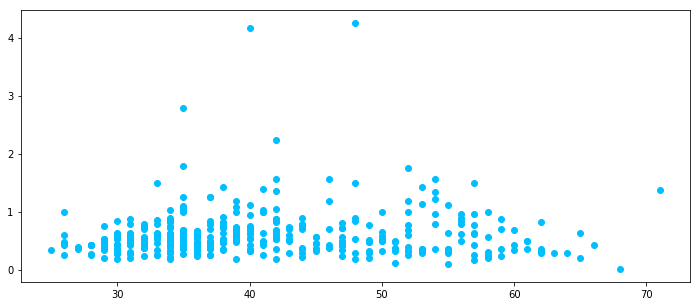

In [41]:
plt.scatter(x=tmp_df['AGE1'], y=tmp_df['INCOME_PER_HOUR'], color='deepskyblue')
plt.show()

2. 다음 회귀분석 모형을 이용해 연령집단별 시간당 임금이 어떻게 다른지 분석하라.

`w = a+b*AGE+u`

In [50]:
x = tmp_df['AGE1'].values.reshape(-1, 1)
y = tmp_df['INCOME_PER_HOUR'].values.reshape(-1, 1)
lm_2 = LinearRegression()
lm_2.fit(x, y)

coef_2 = lm_2.coef_[0][0]
inter_2 = lm_2.intercept_[0]
r_2 = lm_2.score(x, y)

* b = {{round(coef_2,3)}} : 연령이 한살 증가할 때 마다 시간당 임금은 20원 증가하는 경향
* a+u = {{round(inter_2,3)}} : 23세(최소 연령)의 시간당 임금 평균은 약 5130원
* r^2 = {{round(r_2*100,3)}} : 0.3%로 설명력이 적다. 회귀 직선으로 설명할 수 있는 변동이 너무 적기에 좋은 모델이라고 할 수 없다. 


3. 다음 회귀식으로 연령별 임금 분포를 설명하라  
`W = a + b*AGE + c*AGE^2 + u`  

In [61]:
age = tmp_df['AGE1'].values.reshape(-1, 1)
age_squared = np.square(age)
x = np.hstack((age, age_squared))
lm_3 = LinearRegression()
lm_3.fit(x, y)

coef_3 = lm_3.coef_[0]
inter_3 = lm_3.intercept_[0]
r_3 = lm_3.score(x, y)

* a+u = {{round(inter_3,3)}}
* b = {{round(coef_3[0],3)}}: 1) 한살 증가할 때 마다 시간당 임금은 690원 증가하는 추세
* c = {{round(coef_3[1],3)}}  


회귀선은 포물선 형태로 번했다. 45-50세 집단에서 최대 임금 발생.


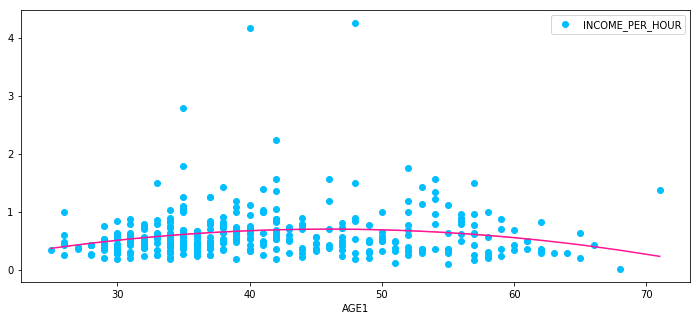

In [89]:
y_pred = lm_3.predict(x)
plt.scatter(x=tmp_df['AGE1'], y=tmp_df['INCOME_PER_HOUR'], color='deepskyblue')
sb.lineplot(tmp_df['AGE1'], y_pred.reshape(1,-1)[0], color='deeppink')
plt.show()

3. 다음 회귀분석 모형을 이용해 성별이 임금에 미치는 영향을 분석하라  
`w = a + b*AGE + c*AGE^2 + d*SEX + u`    

In [106]:
sex = (tmp_df['SEX1']-1).values.reshape(-1, 1)
x = np.hstack((age, age_squared, sex))
lm_4 = LinearRegression().fit(x, y)
coef_4 = lm_4.coef_[0]
inter_4 = lm_4.intercept_[0]
r_4 = lm_4.score(x, y)

* a+u = {{ round(inter_4, 3) }}
* b = {{ round(coef_4[0], 3) }}
* c = {{ round(coef_4[1], 3) }}
* d = {{ round(coef_4[2], 3) }} : 남성은 여성에 비해 시간당 임금이 1660원 적다고 해석할 수 없다. 직군이 혼동요인으로 작용할 수 있다.
* r_squared = {{ round(r_4, 3) }} : r square 값이 0.041로 여전히 낮다.

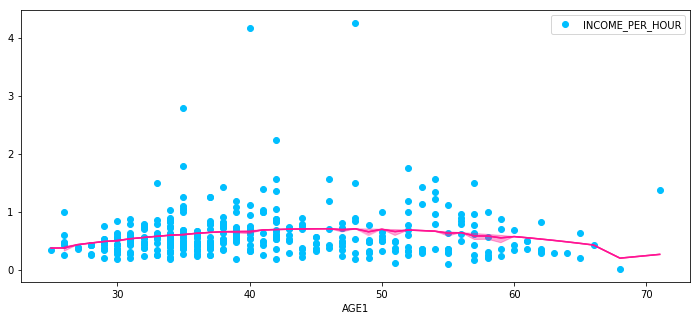

In [118]:
y_pred = lm_4.predict(x)
plt.scatter(x=tmp_df['AGE1'], y=tmp_df['INCOME_PER_HOUR'], color='deepskyblue')
sb.lineplot(tmp_df['AGE1'], y_pred.reshape(1,-1)[0], color='deeppink')

sb.lineplot(tmp_df['AGE1'], y_pred.reshape(1,-1)[0], color='deeppink')
plt.show()

4. 다음 회귀분석 모형을 이용해 성별이 임금에 미치는 영향을 분석하라  
`w = a + b*AGE + c*AGE^2 + d*SEX + e*MAR + u`    

In [137]:
mar = tmp_df['MAR'].apply(lambda x : 1 if x != 2 else 0).values.reshape(-1, 1)
x = np.hstack((age, age_squared, sex, mar))
lm_5 = LinearRegression().fit(x, y)
coef_5 = lm_5.coef_[0]
inter_5 = lm_5.intercept_[0]
r_5 = lm_5.score(x, y)

* a+u = {{ round(inter_5, 3) }}
* b = {{ round(coef_5[0], 3) }}
* c = {{ round(coef_5[1], 3) }}
* d = {{ round(coef_5[2], 3) }}
* e = {{ round(coef_5[3], 3) }}
* r_squared = {{ round(r_5, 3) }}

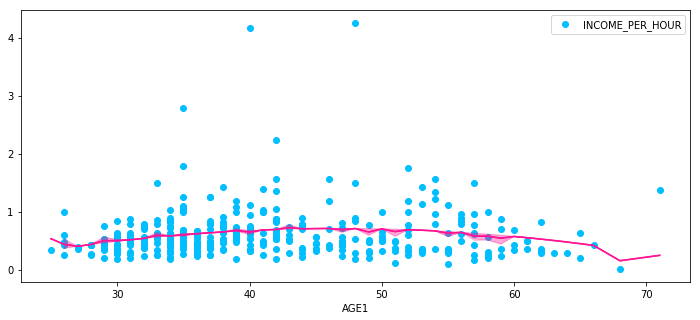

In [141]:
y_pred = lm_5.predict(x)
plt.scatter(x=tmp_df['AGE1'], y=tmp_df['INCOME_PER_HOUR'], color='deepskyblue')
sb.lineplot(tmp_df['AGE1'], y_pred.reshape(1,-1)[0], color='deeppink')

sb.lineplot(tmp_df['AGE1'], y_pred.reshape(1,-1)[0], color='deeppink')
plt.show()

아파트 가격 문제